# Behavior Analysis: Location of Behavior Performed

Press SHIFT + ENTER to run code

### USER INPUT!

In [1]:
## Define project
project_name = 'project_acc_MiniscopeCap'

# Select group and condition, see meta.py to see how you previously defined it for your project
selected_groups = ['Combined']
selected_conditions = ['A_baseline','B_exp_cap','C_baseline_morphine','D_exp_morphine-cap']


### Main Code: Create Figure of Arena Location of Behavior Performed

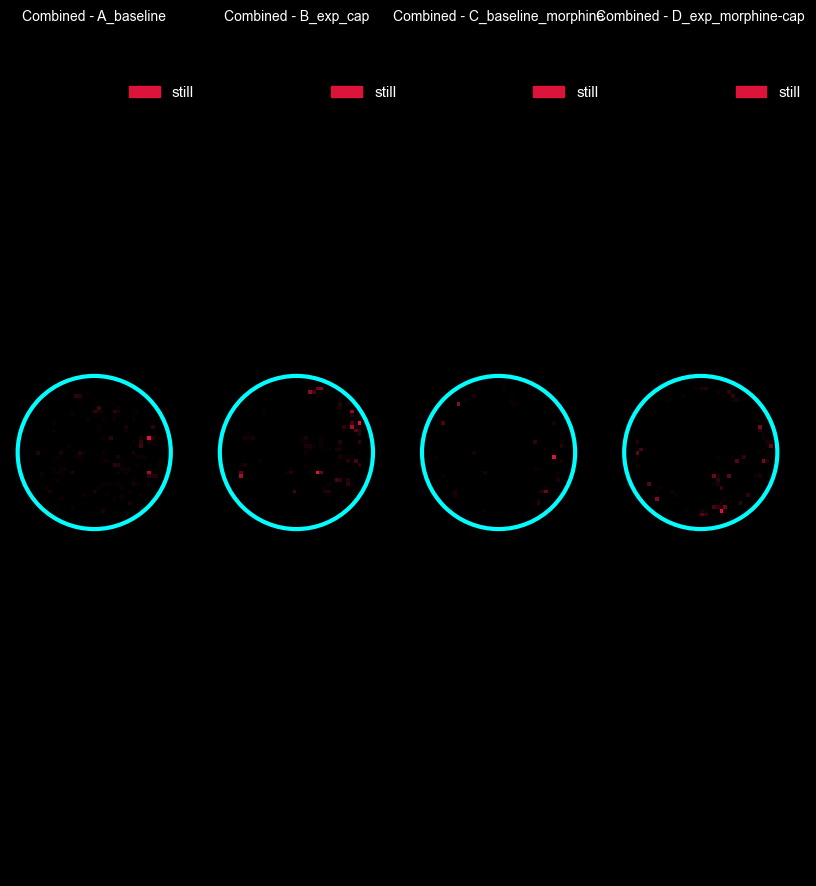

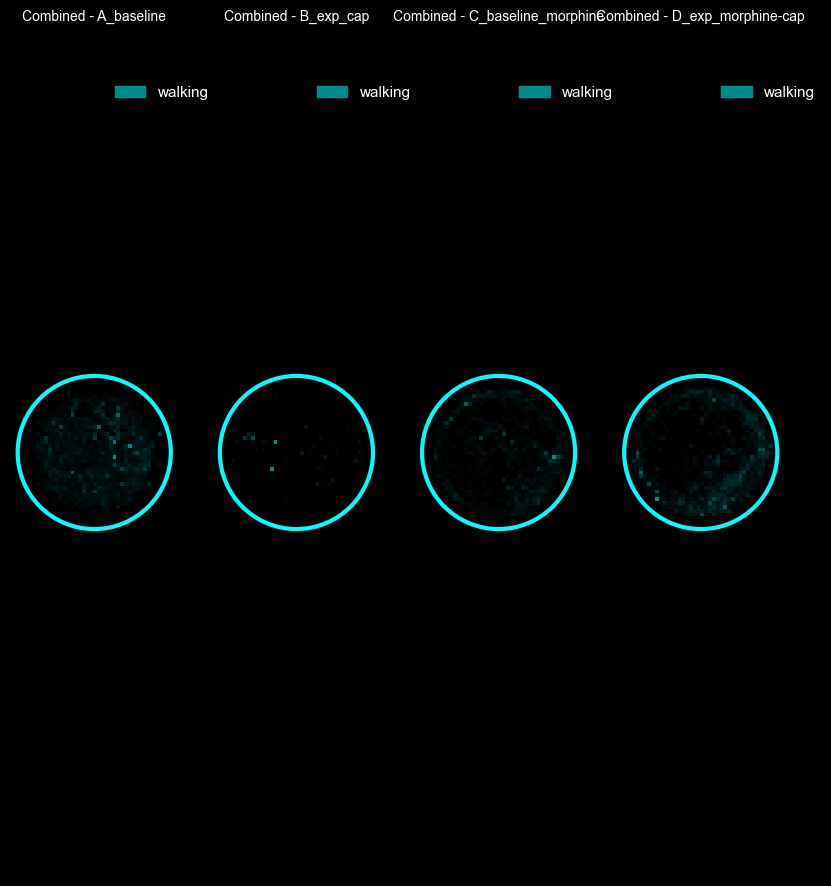

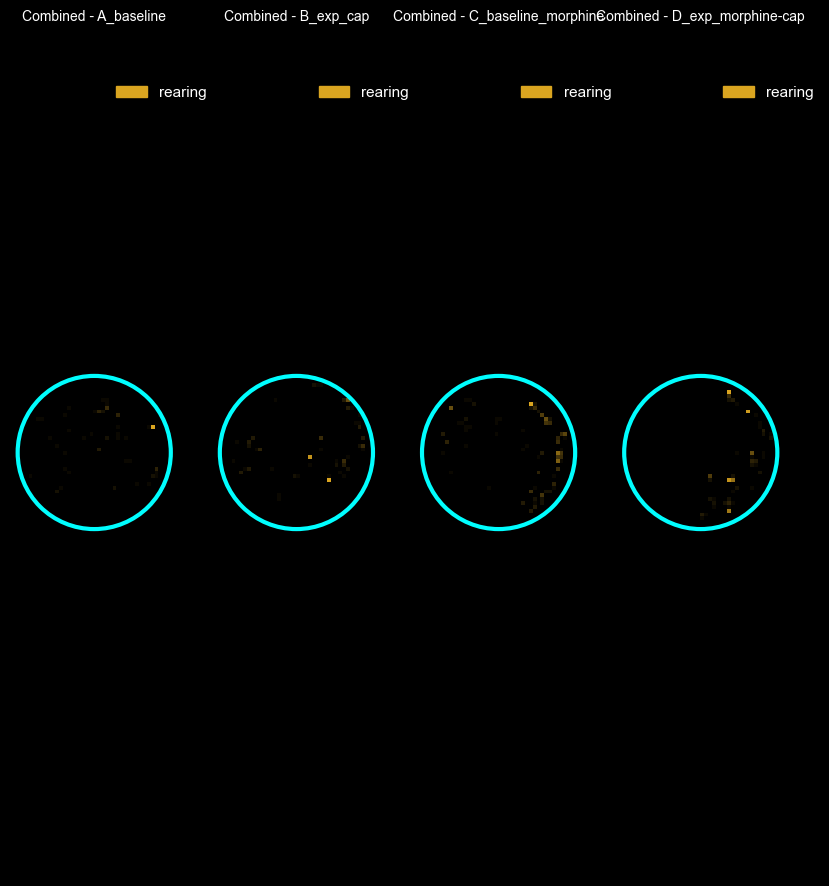

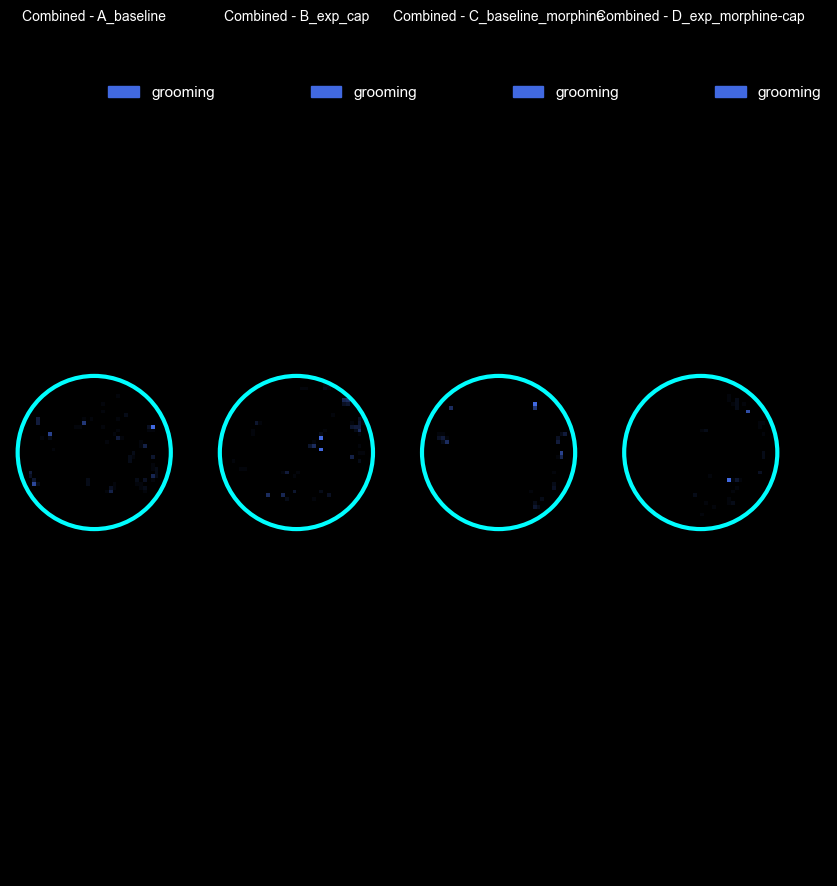

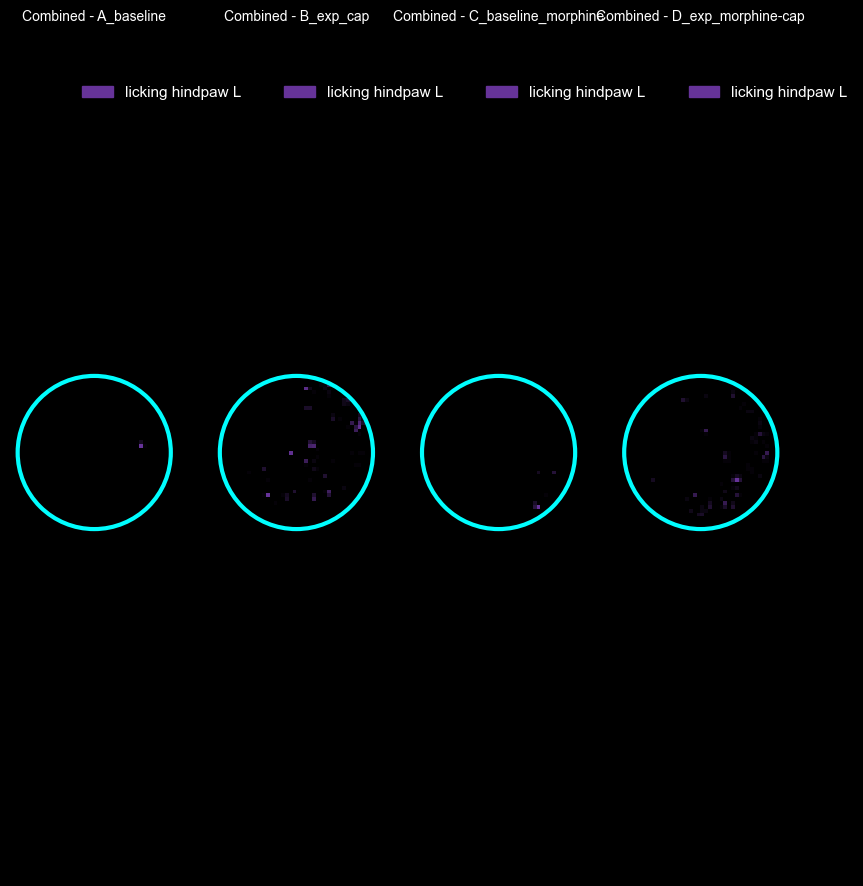

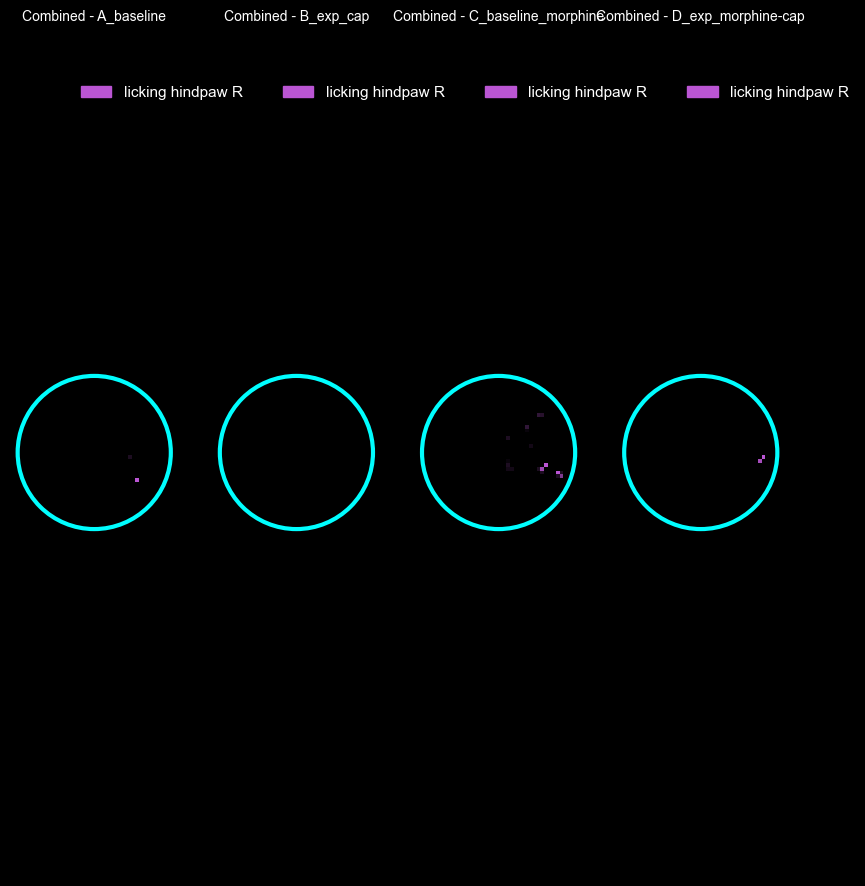

In [2]:
###### RUN DEPENDENCIES ######
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys

if not os.path.join(os.path.abspath(''), '../') in sys.path:
    sys.path.append(os.path.join(os.path.abspath(''), '../'))
    
from utils.classification import load_behaviors, load_data
from utils.meta import *
import matplotlib
import warnings
import seaborn as sns
from matplotlib.patches import Circle
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches

###### Load Pose + Load Behaviors ######
behaviors = load_behaviors(f"../processed_dataset/{project_name}/behaviors_{project_name}.pkl")
poses = load_data(f"../processed_dataset/{project_name}/raw_data_{project_name}.pkl")

# Define the directory path
directory_path = f"../processed_dataset/{project_name}/figures/behavior_location"
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    
# tail-base as position indicator
bodypart_idx = 38
center = (768 / 2, 770 / 2)
radius = 768 / 2 + 20
h = '00FEFF'  # cyan like the logo

rows = len(selected_groups)
cols = len(selected_conditions)

for b, behav_name in enumerate(behavior_names):
    count = 0
    fig = plt.figure(facecolor='#000000', figsize=(10, 11))
    for row in range(rows):
        for col in range(cols):
            ax = fig.add_subplot(rows, cols, int(count+1))
            ax.set_facecolor(None)
            selected_group = selected_groups[row]
            selected_condition = selected_conditions[col]
    
            rgb_val = tuple(int(h[i:i + 2], 16) / 255 for i in (0, 2, 4))
            circle = Circle(center, radius, color=rgb_val, linewidth=3, fill=False)
            hist2d_all = []
            colors = ['#000000', behavior_colors[b]]
            cm = LinearSegmentedColormap.from_list("Custom", colors, N=20)
            heatmaps = np.empty((38, 38))
            for f in range(len(behaviors[selected_group][selected_condition])):
                idx_b = np.where(behaviors[selected_group][selected_condition][f'file{f}'] == b)[0]
                
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore", category=RuntimeWarning)
                    heatmap, xedges, yedges = np.histogram2d(
                        poses[selected_group][selected_condition][f'file{f}'][idx_b, bodypart_idx], poses[selected_group][selected_condition][f'file{f}'][idx_b, bodypart_idx + 1],
                        bins=[np.arange(0, 768, 20), np.arange(0, 770, 20)],
                        density=True)
                heatmap[heatmap == 0] = np.nan
                hist2d_all.append(heatmap)
            extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", category=RuntimeWarning)
                ax.imshow(np.nanmean(hist2d_all, axis=0).T,
                                    extent=extent, origin='lower', cmap=cm)
            # draw legend and circle
            patches = [mpatches.Patch(color=behavior_colors[b], label=behav_name)]
            lgd = ax.legend(handles=patches, facecolor="#000000", frameon=False, prop={"size": 11},
                            ncol=1, bbox_to_anchor=(0.9, 0.9), loc='lower center', edgecolor='w')
            for text in lgd.get_texts():
                text.set_color("#FFFFFF")
            ax.add_patch(circle)
            ax.set_aspect('equal')
            ax.invert_yaxis()
            plt.axis('off')
            plt.axis('equal')
            ax.set_title(f'{selected_group} - {selected_condition}', color='white', fontsize=10)
            count += 1
            if (row, col) == (5, 1) or (row, col) == (5, 2) or (row, col) == (6, 1) or (row, col) == (6, 2):
                fig.delaxes(ax)
            
    
    plt.show()
    
    fig.savefig(f"../processed_dataset/{project_name}/figures/behavior_location/behavior_location_{behav_name}_{project_name}.svg", dpi=600, bbox_inches='tight')
    

# ANALYSIS COMPLETE!